### Mapa de dados de crédito

**Objetivo:** Identificar clientes que tenham possíveis chances de cometer fraudes de crédito

**Importações iniciais**

In [77]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

**Leitura da base de dados**

In [78]:
dataframe = pd.read_csv('credit_data.csv')

**Tratamento de dados faltantes(NaN)**

In [79]:
dataframe = dataframe.dropna()

In [80]:
dataframe.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

**Tratamento de dados negativos**

Nesse caso, iremos substituir esses valores pela média:

In [81]:
dataframe['age'].mean()

40.80755937840458

In [82]:
dataframe.loc[dataframe.age < 0, 'age'] = 40.92

**Divisão do DataFrame**

In [83]:
features = dataframe.iloc[:, 0:4].values

In [84]:
classe = dataframe.iloc[:, 4].values

**Normalização dos dados**

In [85]:
normalizador = MinMaxScaler(feature_range = (0,1))
featutes = normalizador.fit_transform(dataframe)

/home/ana/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [86]:
features

array([[1.00000000e+00, 6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [2.00000000e+00, 3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [3.00000000e+00, 5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [1.99800000e+03, 4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [1.99900000e+03, 4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [2.00000000e+03, 6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

**Construção do mapa auto organizável**

In [87]:
som = MiniSom(x = 15, y = 15, input_len = 4, random_seed = 0)
som.random_weights_init(features)
som.train_random(data = features, num_iteration = 100)

**Visualização dos dados**

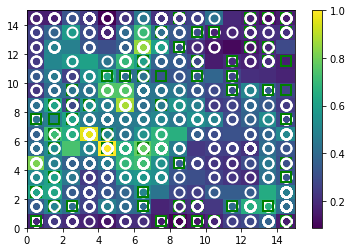

In [88]:
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
color = ['w', 'g']


for i, x in enumerate(features):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[classe[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = color[classe[i]], markeredgewidth = 2)


**Detecção de outliers**

In [89]:
mapeamento = som.win_map(features)

In [91]:
suspeitos = np.concatenate((mapeamento[(13,9)], mapeamento[(1,10)]), axis = 0)

In [93]:
classes = []
for i in range(len(dataframe)):
    for j in range(len(suspeitos)):
        if dataframe.iloc[i, 0] == int(round(suspeitos[j, 0])):
            classes.append(dataframe.iloc[i, 4])
classes = np.array(classes)

In [94]:
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [96]:
suspeitos_final = np.column_stack((suspeitos, classes))

In [98]:
suspeitos_final = suspeitos_final[suspeitos_final[:, 4].argsort()]